# Dance of the bees
Batchrunner Data

Door Roeland Oostdam, Thijme de Bruijn, Gerrit van de Bunt

ABD Challenge

# Gebruiksaanwijzing;
1. **Geef het absolute pad op naar de folder waar de folder 'IntelligentBeesChallenge' zich in bevindt.**
2. Stel parameters op voor de simulatie, deze kan je onderverdelen in variable en fixed parameters die je hier ook onder kan definieren. **Let op: voor variable parameters moet je een range object opgeven**
3. Zorg ervoor dat alle parameters zijn ingedeeld in of variable of fixed parameters en run dan alle cells.

# Parameters:
"height" : Hoogte van de grid van de omgeving \
"width : Breedte van de grid van de omgeving \
"init_bees" : Aantal bijen in de omgeving aan het begin \
"init_flowers" : Aantal bloemvelden in de omgeving aan het begin \
"min_nectar" : Minimale hoeveelheid nectar beschikbaar in bloemvelden \
"max_nectar" : Maximale hoeveelheid nectar beschikbaar in bloemvelden \
"init_min_nectar_grade" : Minimale kwaliteit nectar wat kan voorkomen \
"init_max_nectar_grade" : Maximale kwaliteit nectar wat kan voorkome \
"nectar_respawn_interval" : Aantal timesteps dat minimaal verstrijkt voordat nectar terug komt op een bloemenveld \
"max_bee_energy" : Capaciteit energie die een bij kan hebben nadat hij bij een bijenkorf geweest is en aan het begin \
"collect_negative_value_nectar" : Collect negative value nectar (?) \
"perception_range" : Hoe ver de bij kan zien om bloemenvelden/nectar te identificeren en op te slaan in memory.

In [266]:
# BATCHRUNNER PARAMS

# Voorbeeld:
# Als dit het pad is waar de notebook zich in bevindt;
# C:\Users\gvand\Projecten\Pycharm\ABD\IntelligentBeesChallenge\Dance of the bees Batchrunner Data.ipynb
# Geef dan dit op als project path:
# proj_path = r"C:\Users\gvand\Projecten\Pycharm\ABD"

proj_path = r"C:\Users\gvand\Projecten\Pycharm\ABD"

fixed_params = {
    "height": 20,
    "width": 20,
    "init_bees": 1,
    "min_flower_distance": 8,
    "init_min_nectar_grade": 20,
    "init_max_nectar_grade": 40,
    "min_nectar": 2,
    "max_nectar": 2,
    "nectar_respawn_interval": 100,
    "collect_negative_value_nectar": False,
    "perception_range": 1,
    "max_bee_energy": 50, 
}

variable_params = {
    "init_flowers": [3,5,7,9],
    "max_clue_radius": [0, 5, 10, 15, 20]
}

In [267]:
# Zet content root op om import problemen te voorkomen
import sys
sys.path.insert(1, proj_path)

In [268]:
# Importeer benodigde onderdelen voor de batchrunner
from mesa.batchrunner import BatchRunner, BatchRunnerMP
from bee_simulation.model import BeeSimulation, get_nectar_per_t, get_bee_energy, get_hive_energy, \
    get_nectar_collected, get_steps

In [271]:
batch_run = BatchRunnerMP(BeeSimulation,
                        nr_processes=10,
                        variable_parameters=variable_params,
                        fixed_parameters=fixed_params,
                        iterations=200,
                        max_steps=1000,
                        model_reporters={
                            "Nectar/T": get_nectar_per_t,
                            "Bee energy": get_bee_energy,
                            "Nectar stored": get_hive_energy,
                            "Nectar Collected": get_nectar_collected,
                            "Steps past": get_steps,
                        })
batch_run.run_all()
model_data = batch_run.get_model_vars_dataframe()
collector_data = batch_run.get_collector_model()

4000it [12:05,  5.51it/s]


In [275]:
df = model_data[['Steps past', 'init_flowers', 'max_clue_radius']]
df = df.rename(columns={'Steps past': 'steps_past'})
df

,steps_past,init_flowers,max_clue_radius
0,70,3,0
2658,150,7,15
2659,70,7,15
2660,70,7,15
2661,70,7,15
...,...,...,...
1339,120,5,5
1340,70,5,5
1341,107,5,5
1328,70,5,5


In [273]:
import matplotlib.pyplot as plt

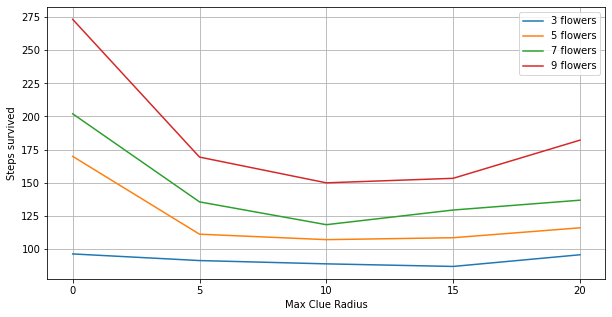

In [280]:
fig = plt.figure(figsize=[10,5])
for x in variable_params['init_flowers']:
    data = df.loc[df['init_flowers'] == x].groupby('max_clue_radius').mean().drop('init_flowers',axis=1)
    plt.plot(data, label=f'{x} flowers')

plt.grid()
plt.xticks(variable_params['max_clue_radius'])
plt.legend()
plt.xlabel('Max Clue Radius')
plt.ylabel('Steps survived')
plt.show()

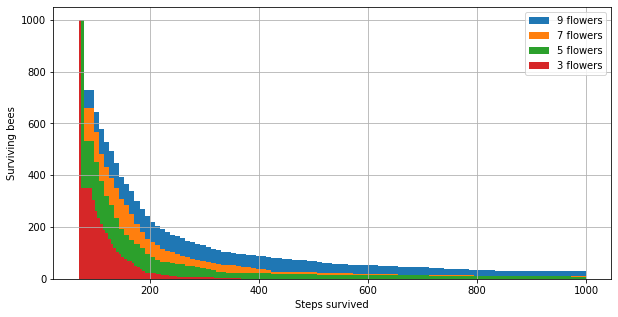

In [300]:
plt.figure(figsize=[10,5])
plt.hist(df.loc[df['init_flowers'] == 9]['steps_past'], bins=100, cumulative=-1, label='9 flowers')
plt.hist(df.loc[df['init_flowers'] == 7]['steps_past'], bins=100, cumulative=-1, label='7 flowers')
plt.hist(df.loc[df['init_flowers'] == 5]['steps_past'], bins=100, cumulative=-1, label='5 flowers')
plt.hist(df.loc[df['init_flowers'] == 3]['steps_past'], bins=100, cumulative=-1, label='3 flowers')

plt.grid()
plt.legend()
plt.ylabel('Surviving bees')
plt.xlabel('Steps survived')
plt.show()

In [78]:
df.columns

Index(['steps_past'], dtype='object')

<AxesSubplot:>

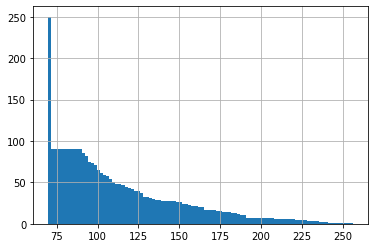

In [234]:
import matplotlib.pyplot as plt
df.loc[df['init_flowers'] == 3]['steps_past'].hist(bins=100, cumulative=-1)

In [ ]:
df

In [ ]:
collector_data